## Exploratory


This notebook is for exploratory approach. Looking at how features look like, investigating how do they individually discriminate classes, etc... To give insights for example for feature engineering.

In [1]:
import os

import imageio
import pandas as pd
from tqdm import tqdm

data_dir = "../data"

# Read train.csv
# TODO: rm n-rows
train = pd.read_csv(os.path.join(data_dir, "train.csv"), sep=',')
pet_ids = train["PetID"]



In [2]:
train.iloc[0]

Type                                                             2
Name                                                        Nibble
Age                                                              3
Breed1                                                         299
Breed2                                                           0
Gender                                                           1
Color1                                                           1
Color2                                                           7
Color3                                                           0
MaturitySize                                                     1
FurLength                                                        1
Vaccinated                                                       2
Dewormed                                                         2
Sterilized                                                       2
Health                                                        

In [3]:
## Example of sentiment

#sent_file = "0a0e8c15b.json"

#ex_sent = pd.read_csv(os.path.join(data_dir, sent_file), sep=',', nrows=10)
#pet_ids = train["PetID"]

# Read 1 image per pet
# TODO: there are more than 1 image per pet in the folder.


In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, cohen_kappa_score
from sklearn.model_selection import train_test_split

In [5]:
selected_columns = ["Type", "Age", "Breed1", "Breed2", "Gender", "Color1", "Color2", "Color3",
                    "MaturitySize", "FurLength", "Vaccinated", "Dewormed", "Sterilized", "Health",
                    "Quantity", "Fee", "State", "VideoAmt", "PhotoAmt"]

label_column = "AdoptionSpeed"

y = train[label_column]
X = train[selected_columns]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
rf = RandomForestClassifier(max_depth=12, n_estimators=60).fit(X_train, y_train)
predictions = rf.predict(X_test)


print("Kappa on train: {}".format(round(cohen_kappa_score(y_train, rf.predict(X_train), weights="quadratic"), 4)))
print("Accuracy on train: {}".format(round(accuracy_score(y_train, rf.predict(X_train), 4))))
print("________________")
print("Kappa on test: {}".format(round(cohen_kappa_score(y_test, predictions, weights="quadratic"), 4)))
print("Accuracy on test: {}".format(round(accuracy_score(y_test, predictions), 4)))


Kappa on train: 0.6568
Accuracy on train: 1.0
________________
Kappa on test: 0.3339
Accuracy on test: 0.4037


## Data exploration

Questions:

1) How much data is there - ~15k

2) How many of each label in data - 

In [6]:
len(train)

14993

In [7]:
import seaborn as sns
sns.set(style="whitegrid")
tips = sns.load_dataset("tips")

In [8]:
train["AdoptionSpeed"].value_counts()

4    4197
2    4037
3    3259
1    3090
0     410
Name: AdoptionSpeed, dtype: int64

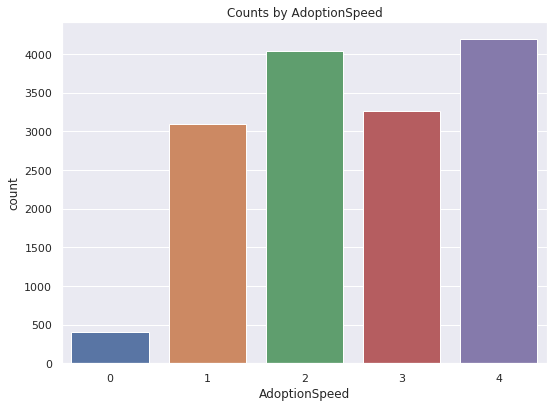

In [23]:
sns.set(rc={'figure.figsize':(8.7,6.27)})

ax = sns.countplot(x="AdoptionSpeed", data=train).set_title("Counts by AdoptionSpeed")

In [10]:
train["Age"].describe()

count    14993.000000
mean        10.452078
std         18.155790
min          0.000000
25%          2.000000
50%          3.000000
75%         12.000000
max        255.000000
Name: Age, dtype: float64

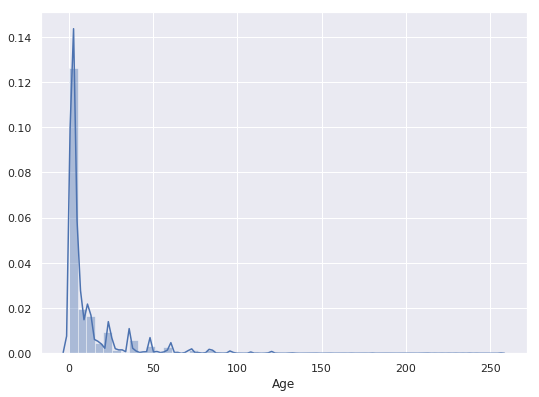

In [24]:
ax = sns.distplot(train["Age"])

## Investigating age



In [12]:
# Distributions per adoptionspeed for age

In [13]:
adoptionGroups = train.groupby("AdoptionSpeed")

In [21]:
import matplotlib.pyplot as plt


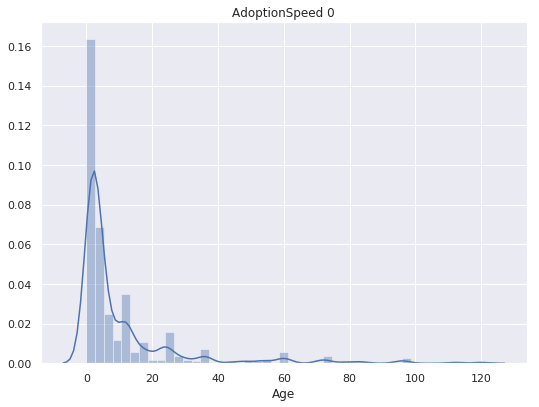

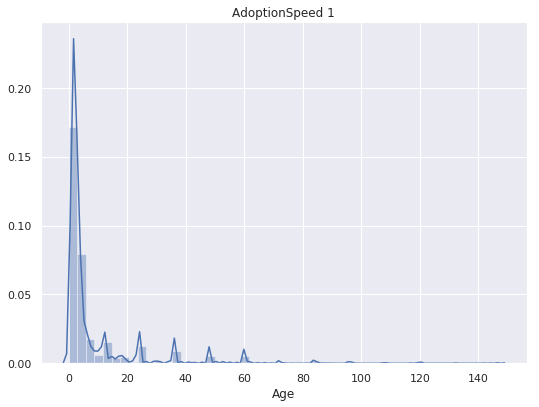

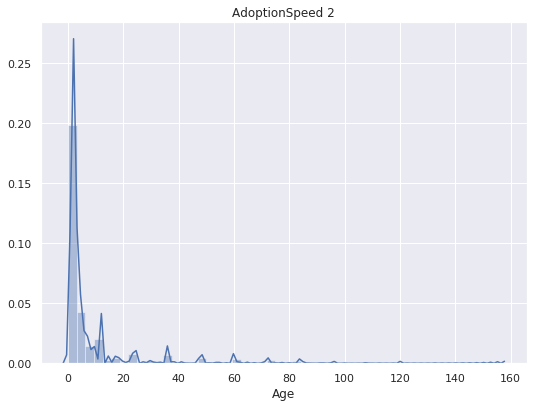

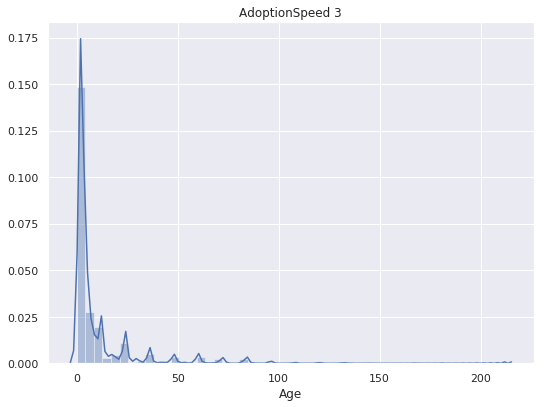

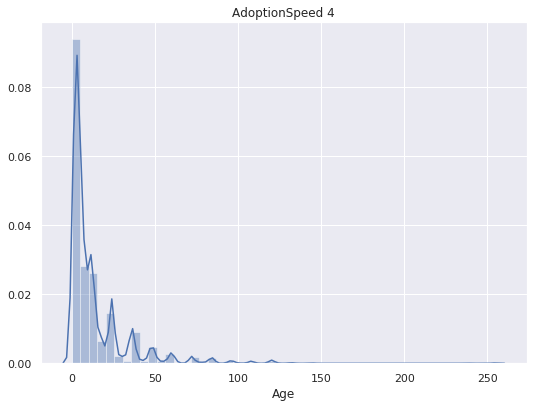

In [25]:
for group in adoptionGroups:
    sns.distplot(group[1]["Age"]).set_title("AdoptionSpeed {}".format(group[0]))
    plt.show()
    #print(group[1])

Text(0.5, 1.0, 'Fee')

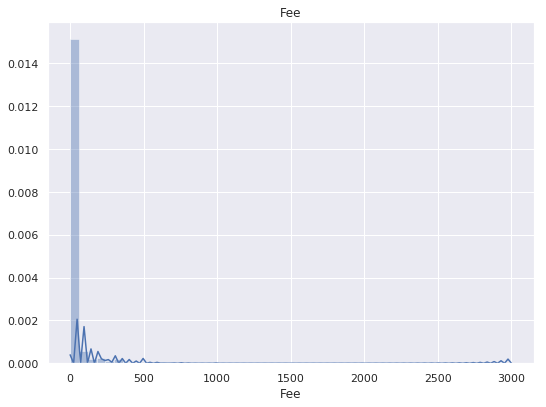

In [29]:
sns.distplot(train["Fee"]).set_title("Fee")



We can see that there are some samples, with relly high Fee. Lets take a look at all samples with fee above 2000. We can see, that there is one sample having fee of 3000

In [30]:
train[train.Fee > 2000]

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
8722,1,Khaleesi And Drogo,4,103,0,3,1,2,0,3,...,1,2,3000,41325,39d5c79a7422fa53b8fdeaec67b3dbda,0,Both pups are family home trained. They love t...,e74dd0579,5.0,3
